In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def neville(knots,f):
    """
    Perform polynomial interpolation using Neville's algorithm.

    Parameters
    ----------
    knots : numpy.ndarray
        An array of x-values (knots) at which the function is known.
    f : numpy.ndarray
        An array of corresponding function values at the knots.

    Returns
    -------
    List[List[Callable]]
        A matrix that contains every polynomial at the neville sheme. Matrix[0,N] is the interpolation polynomial that can be used to find interpolated values at specific points.

    Notes
    -----
    The interpolation function takes a single argument (x) and returns the interpolated value at that point.
    """
    
    N = len(knots)

    def interpolation(x):
        matrix = np.zeros((N,N))
        matrix[:,0] = f

        for col in range(1, N):
            for row in range(0, N-col):
                matrix[row, col] = ((x-knots[row])*matrix[row+1, col-1] - (x-knots[row+col])*matrix[row, col-1]) / (knots[row+col]-knots[row])
        
        return matrix

    return interpolation

# Define the $D_{sym}$ function

In [7]:
def D_sym(x_0, h, func):
    """
    Returns the symmetric difference quotient.

    Parameters
    ----------
    x_0 : float
        The point at which we evaluate the symmetric difference quotient.

    h : float
        The step difference.

    func : Callable
        The function for which we calculate the symmetric difference.

    Returns
    -------
    float:
        The symmetric difference quotient


    """
            
    return (func(x_0+h)-func(x_0-h))/(2*h)


Define knots and calc the symmetric difference quotient. In that way we have D as a function of h. We do not really care for f after that point.

In [8]:
knots = np.array([2**(-i) for i in range(10)])
values = D_sym(np.pi/4, knots, np.tan)

In [9]:
N = neville(knots, values)

In [10]:
res = N(0)[:,:4]
res

array([[-2.18503986,  8.41467076, -1.13075096,  2.57884581],
       [ 3.11481545,  1.25560447,  2.11514622,  1.98837158],
       [ 2.18520996,  1.90026078,  2.00421841,  1.99966716],
       [ 2.04273537,  1.978229  ,  2.00023607,  1.9999827 ],
       [ 2.01048219,  1.9947343 ,  2.00001437,  1.99999897],
       [ 2.00260824,  1.99869435,  2.00000089,  1.99999994],
       [ 2.0006513 ,  1.99967426,  2.00000006,  2.        ],
       [ 2.00016278,  1.99991861,  2.        ,  0.        ],
       [ 2.00004069,  1.99997965,  0.        ,  0.        ],
       [ 2.00001017,  0.        ,  0.        ,  0.        ]])

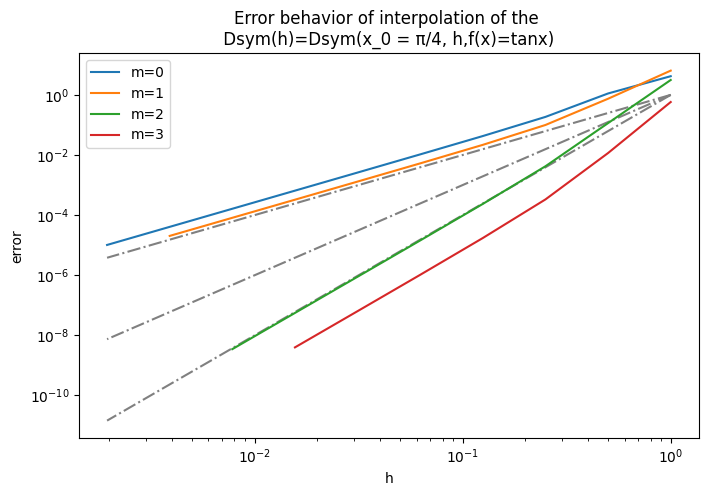

In [17]:
fig, ax = plt.subplots(1,1 , figsize=(8,5))

ax.plot(knots, knots**(2), c='grey', linestyle='-.')
ax.plot(knots, knots**(3), c='grey', linestyle='-.')
ax.plot(knots, knots**(4), c='grey', linestyle='-.')
length = len(knots)

for m in range(4):
    ax.plot(knots[0:length-m], abs(res[0:length-m, m]-2), label=f'm={m}')



ax.set(xscale='log', yscale='log', xlabel ='h', ylabel='error', title='Error behavior of interpolation of the \n Dsym(h)=Dsym(x_0 = π/4, h,f(x)=tanx) ')
ax.legend()